In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import class_weight
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("/content/Phishing_Email.csv", engine='python', on_bad_lines='skip')

In [ ]:
df2 = data
df2

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
4703,4703,fw : summary rto week day 2 - - planning & exp...,Safe Email
4704,4704,"\nI'm not familiar with Dell Dimension XPS, an...",Safe Email
4705,4705,hi paliourg need discount meds ? for you we go...,Phishing Email
4706,4706,hpl status please find the attached status upd...,Safe Email


In [ ]:
df2['Email Type'].value_counts()

,count
Email Type,
Safe Email,2820
Phishing Email,1888


In [ ]:
df2.isna().sum()

,0
Unnamed: 0,0
Email Text,8
Email Type,0


In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isna().sum()

,0
Unnamed: 0,0
Email Text,0
Email Type,0


In [ ]:
df2['Email Type'].value_counts()

,count
Email Type,
Safe Email,2820
Phishing Email,1880


In [ ]:
df = df2[df2["Email Type"].isin(df2["Email Type"].value_counts().head(2).index)]
df

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...,...
4703,4703,fw : summary rto week day 2 - - planning & exp...,Safe Email
4704,4704,"\nI'm not familiar with Dell Dimension XPS, an...",Safe Email
4705,4705,hi paliourg need discount meds ? for you we go...,Phishing Email
4706,4706,hpl status please find the attached status upd...,Safe Email


In [ ]:
df["Email Type"].value_counts()

,count
Email Type,
Safe Email,2820
Phishing Email,1880


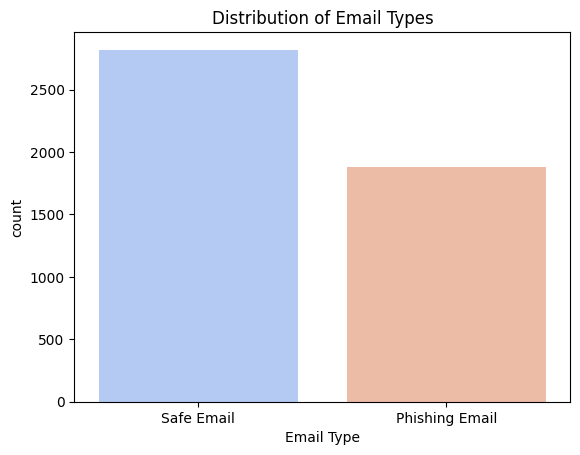

In [ ]:
sns.countplot(x="Email Type", data = df, palette = 'coolwarm')
plt.title("Distribution of Email Types")
plt.show()

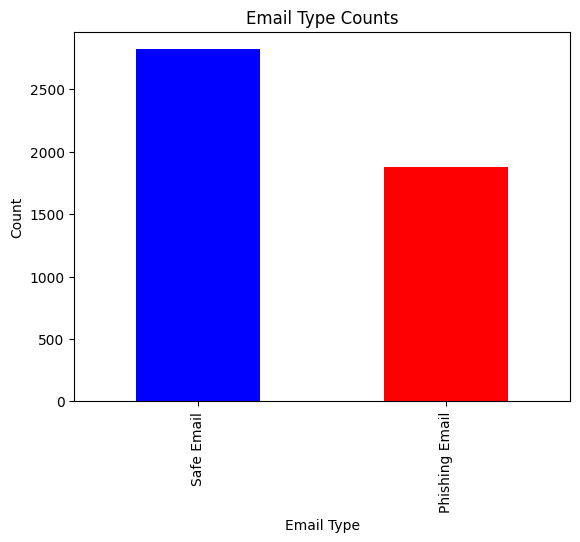

In [ ]:
df["Email Type"].value_counts().plot(kind = "bar", color = ["blue","red"])
plt.title("Email Type Counts")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

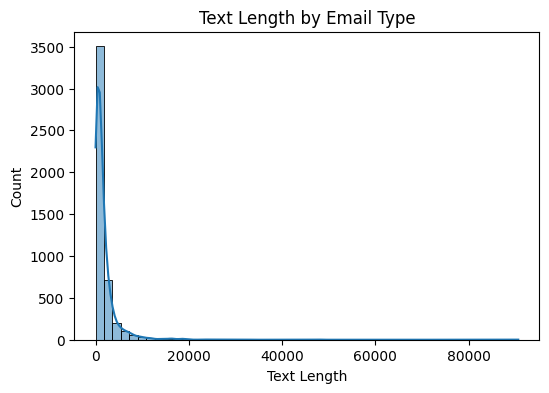

In [ ]:
df["Text Length"] = df["Email Text"].astype(str).apply(len)
plt.figure(figsize = (6,4))
sns.histplot(df["Text Length"], bins = 50, kde = True)
plt.title("Text Length by Email Type")
plt.show()

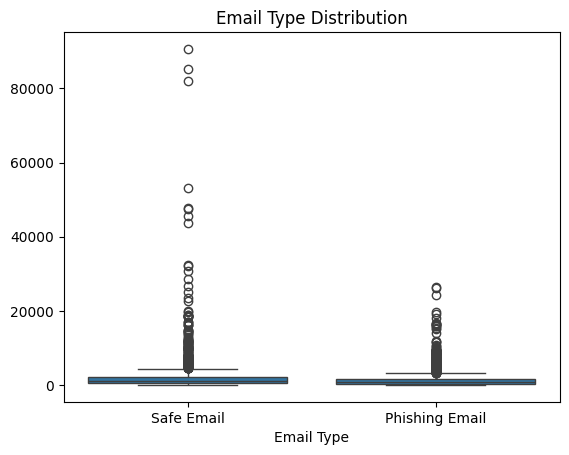

In [ ]:
sns.boxplot(x="Email Type", y="Text Length", data = df)
plt.title("Email Type Distribution")
plt.ylabel("")
plt.show()

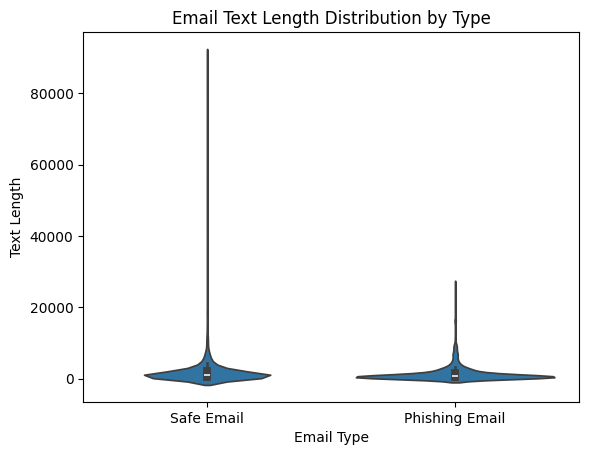

In [ ]:
sns.violinplot(x = "Email Type", y = 'Text Length', data = df)
plt.title("Email Text Length Distribution by Type")
plt.show()

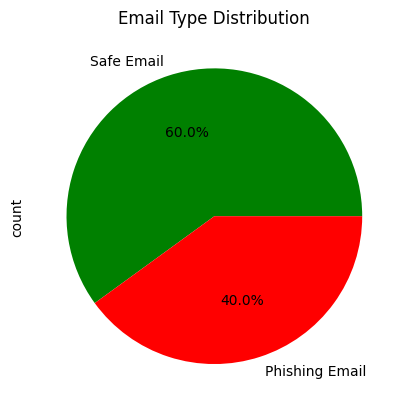

In [ ]:
df["Email Type"].value_counts().plot.pie(autopct = "%1.1f%%", colors = ['green','red'])
plt.title("Email Type Distribution")
plt.show()

In [ ]:
df.head()

,Unnamed: 0,Email Text,Email Type,Text Length
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


In [ ]:
df["Email Type"] = df["Email Type"].map({"Safe Email":0, "Phishing Email":1})
df

,Unnamed: 0,Email Text,Email Type,Text Length
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",0,1030
1,1,the other side of * galicismos * * galicismo *...,0,479
2,2,re : equistar deal tickets are you still avail...,0,1245
3,3,\nHello I am your hot lil horny toy.\n I am...,1,688
4,4,software at incredibly low prices ( 86 % lower...,1,441
...,...,...,...,...
4703,4703,fw : summary rto week day 2 - - planning & exp...,0,7311
4704,4704,"\nI'm not familiar with Dell Dimension XPS, an...",0,767
4705,4705,hi paliourg need discount meds ? for you we go...,1,2213
4706,4706,hpl status please find the attached status upd...,0,67


In [ ]:
X = df["Email Text"]
y = df["Email Type"]

In [ ]:
def advanced_clean_text(text):
    text = text.lower()
    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [w for w in words if w not in stop_words]

    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in words]

    return " ".join(stemmed_words)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')  # Also needed for tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
X = X.astype(str).apply(advanced_clean_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42,
                                                    stratify = y)

### TF-IDF unigrams

In [ ]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
class_weights

array([0.82373697, 1.27223186])

In [ ]:
class_weights_dict

{0: np.float64(0.8237369687249398), 1: np.float64(1.2722318553381224)}

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = LogisticRegression(class_weight=class_weights_dict)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: np.float64(0.8237369687249398),
                                 1: np.float64(1.2722318553381224)})

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.9700155763239875
Confusion Matrix:
 [[1496   63]
 [  14  995]]
Precision: 0.9404536862003781
Recall: 0.9861248761149654
F1-Score: 0.9627479438800194


In [ ]:
def evaluate_model(y_test,y_pred):
    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, p, r, f1

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(class_weight = class_weights_dict),
    "Decision Tree Classifier": DecisionTreeClassifier(class_weight = class_weights_dict),
    "Random Forest Classifier": RandomForestClassifier(class_weight = class_weights_dict),
    "XGBoost Regressor" : XGBClassifier(class_weight = class_weights_dict),
    "CatBoost": CatBoostClassifier(auto_class_weights='Balanced', verbose=0),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictionss
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_acc , model_train_p, model_train_r, model_train_f1 = evaluate_model(y_train, y_train_pred)

    model_test_acc , model_test_p, model_test_r, model_test_f1 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_acc))
    print("- Precision: {:.4f}".format(model_train_p))
    print("- Recall: {:.4f}".format(model_train_r))
    print("- F1 score: {:.4f}".format(model_train_f1))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_acc))
    print("- Precision: {:.4f}".format(model_test_p))
    print("- Recall: {:.4f}".format(model_test_r))
    print("- F1 score:{:.4f}".format(model_test_f1))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9809
- Precision: 0.9565
- Recall: 0.9968
- F1 score: 0.9762
----------------------------------
Model performance for Test set
- Accuracy: 0.9700
- Precision: 0.9405
- Recall: 0.9861
- F1 score:0.9627


Decision Tree Classifier
Model performance for Training set
- Accuracy: 0.9890
- Precision: 0.9728
- Recall: 1.0000
- F1 score: 0.9862
----------------------------------
Model performance for Test set
- Accuracy: 0.9097
- Precision: 0.8754
- Recall: 0.8979
- F1 score:0.8865


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9890
- Precision: 0.9728
- Recall: 1.0000
- F1 score: 0.9862
----------------------------------
Model performance for Test set
- Accuracy: 0.9556
- Precision: 0.9479
- Recall: 0.9386
- F1 score:0.9432


XGBoost Regressor
Model performance for Training set
- Accuracy: 0.9832
- Precision: 0.9609
- Recall: 0.9978
- F1 score: 0.9790
----------------------------------
Model perfo

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

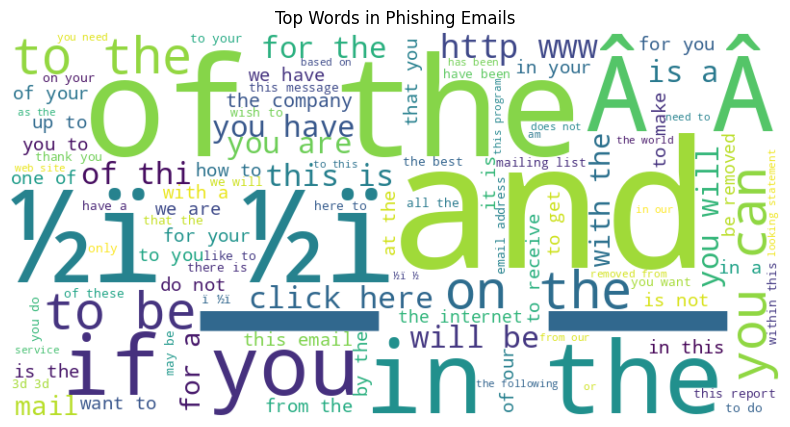

In [ ]:

# Filter phishing emails only
phishing_text = " ".join(df[df['Email Type'] == 1]['Email Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords='english', max_words=100).generate(phishing_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words in Phishing Emails")
plt.show()


In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

GPU available: True
Device name: Tesla T4


In [ ]:
# Train-test split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Email Text'].tolist(), df['Email Type'].tolist(), test_size=0.2, random_state=42)

In [ ]:
# Ensure all entries are strings and remove NaNs
train_texts = [str(t) for t in train_texts if pd.notna(t)]
val_texts = [str(t) for t in val_texts if pd.notna(t)]

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch

class PhishingDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = PhishingDataset(train_encodings, train_labels)
val_dataset = PhishingDataset(val_encodings, val_labels)


In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision = precision_score(labels, preds)
    recall = recall_score(labels, preds)
    f1 = f1_score(labels, preds)
    return {"accuracy": acc,
            "precision": precision,
            "recall": recall,
            "f1_score": f1}

In [ ]:
from transformers import Trainer, TrainingArguments

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: melica9419 (melica9419-student) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.247300
1000,0.094300
1500,0.054900
2000,0.049000
2500,0.030300
3000,0.025600
3500,0.020700


TrainOutput(global_step=3728, training_loss=0.07125579850356466, metrics={'train_runtime': 5919.8522, 'train_samples_per_second': 10.071, 'train_steps_per_second': 0.63, 'total_flos': 1.568562867634176e+16, 'train_loss': 0.07125579850356466, 'epoch': 4.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.06999124586582184,
 'eval_runtime': 112.4519,
 'eval_samples_per_second': 33.143,
 'eval_steps_per_second': 1.04,
 'epoch': 4.0}

In [ ]:
preds = trainer.predict(val_dataset)
pred_labels = preds.predictions.argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(val_labels, pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.9927    0.9780    0.9853      2224
           1     0.9681    0.9894    0.9786      1503

    accuracy                         0.9826      3727
   macro avg     0.9804    0.9837    0.9819      3727
weighted avg     0.9828    0.9826    0.9826      3727

